In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntProgress
from IPython.display import display
from scipy.stats import mannwhitneyu, wilcoxon

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.utils.qt_helper import gui_fnames, gui_fpath
from lib.gallegosalas.data_fc_db import DataFCDatabase
from mesostat.metric.metric import MetricCalculator

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis


In [2]:
params = {}
# params['experiment_path']  = gui_fpath("Path to data collection",  './')
# params['experiment_path'] = '/media/alyosha/Data/TE_data/yasirdata/auditory_task_all_trials'
params['experiment_path'] = '/media/alyosha/Data/TE_data/yasirdata/tactile_task_all_trials'

In [3]:
dataDB = DataFCDatabase(params)

Target range of [20, 95] timesteps amounts to [1.0, 4.7, 'seconds']
Reading channel label file
Searching for data files


In [4]:
dataDB.read_neuro_files()
len(dataDB.dataNeuronal)

IntProgress(value=0, description='Read Neuro Data:', max=6)

6

## 1.1 Average Correlation

**TODO**:
* Plot correlation matrices
* See if there is a proximity metric from connectomics that for nearest neighbors

doing mouse m15
doing mouse m18
doing mouse m5
doing mouse m6
doing mouse m7
doing mouse m9


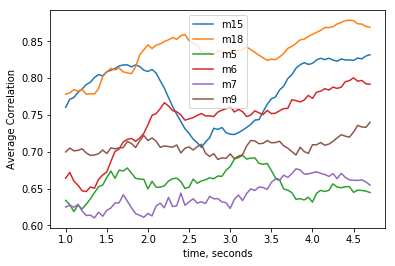

In [8]:
mc = MetricCalculator(serial=True, verbose=False)

plt.figure()
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    print('doing mouse', mousename)
    rows = dataDB.get_rows('neuro', {'mousename' : mousename})
    
    for idx, row in rows.iterrows():
        mc.set_data(dataDB.dataNeuronal[idx], 'rsp', zscoreDim=None)
        rez = mc.metric3D('avgcorr', 's', metricSettings=None, sweepSettings=None)
        plt.plot(dataDB.targetTimes,rez, label=mousename)
        
plt.legend()
plt.xlabel('time, seconds')
plt.ylabel('Average Correlation')
plt.show()

doing mouse m15
doing mouse m18
doing mouse m5
doing mouse m6
doing mouse m7
doing mouse m9


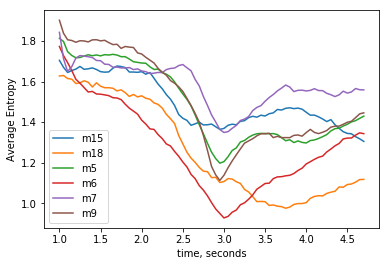

In [14]:
plt.figure()
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    print('doing mouse', mousename)
    rows = dataDB.get_rows('neuro', {'mousename' : mousename})
    
    for idx, row in rows.iterrows():
        mc.set_data(dataDB.dataNeuronal[idx], 'rsp', zscoreDim='p')
        rez = mc.metric3D('avg_entropy', 's', metricSettings=None, sweepSettings=None)
        plt.plot(dataDB.targetTimes,rez, label=mousename)
        
plt.legend()
plt.xlabel('time, seconds')
plt.ylabel('Average Entropy')
plt.show()

doing mouse m15
doing mouse m18
doing mouse m5
doing mouse m6
doing mouse m7
doing mouse m9


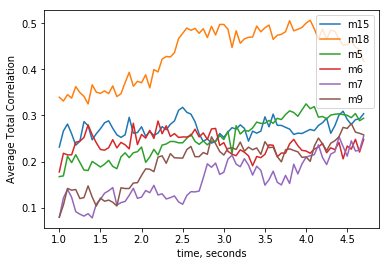

In [13]:
plt.figure()
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    print('doing mouse', mousename)
    rows = dataDB.get_rows('neuro', {'mousename' : mousename})
    
    for idx, row in rows.iterrows():
        mc.set_data(dataDB.dataNeuronal[idx], 'rsp', zscoreDim='p')
        rez = mc.metric3D('avg_TC', 's', metricSettings=None, sweepSettings=None)
        plt.plot(dataDB.targetTimes,rez, label=mousename)
        
plt.legend()
plt.xlabel('time, seconds')
plt.ylabel('Average Total Correlation')
plt.show()

doing mouse m15
doing mouse m18
doing mouse m5
doing mouse m6
doing mouse m7
doing mouse m9


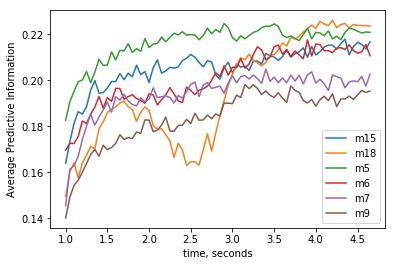

In [16]:
maxLag = 1
plt.figure()
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    print('doing mouse', mousename)
    rows = dataDB.get_rows('neuro', {'mousename' : mousename})
    
    for idx, row in rows.iterrows():
        mc.set_data(dataDB.dataNeuronal[idx], 'rsp', zscoreDim='p', timeWindow=2)
        rez = mc.metric3D('avg_PI', 's', metricSettings={'max_lag': maxLag}, sweepSettings=None)
        plt.plot(dataDB.targetTimes[:-maxLag], rez, label=mousename)
        
plt.legend()
plt.xlabel('time, seconds')
plt.ylabel('Average Predictive Information')
plt.show()